   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

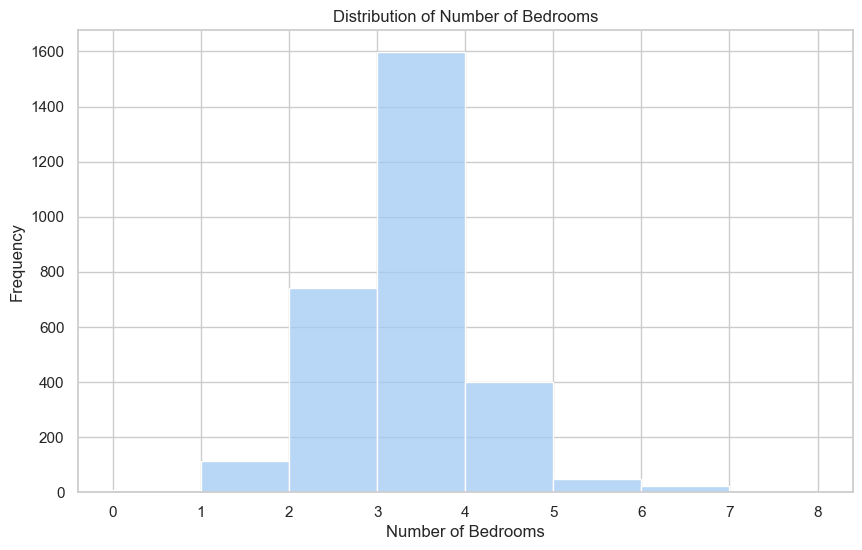

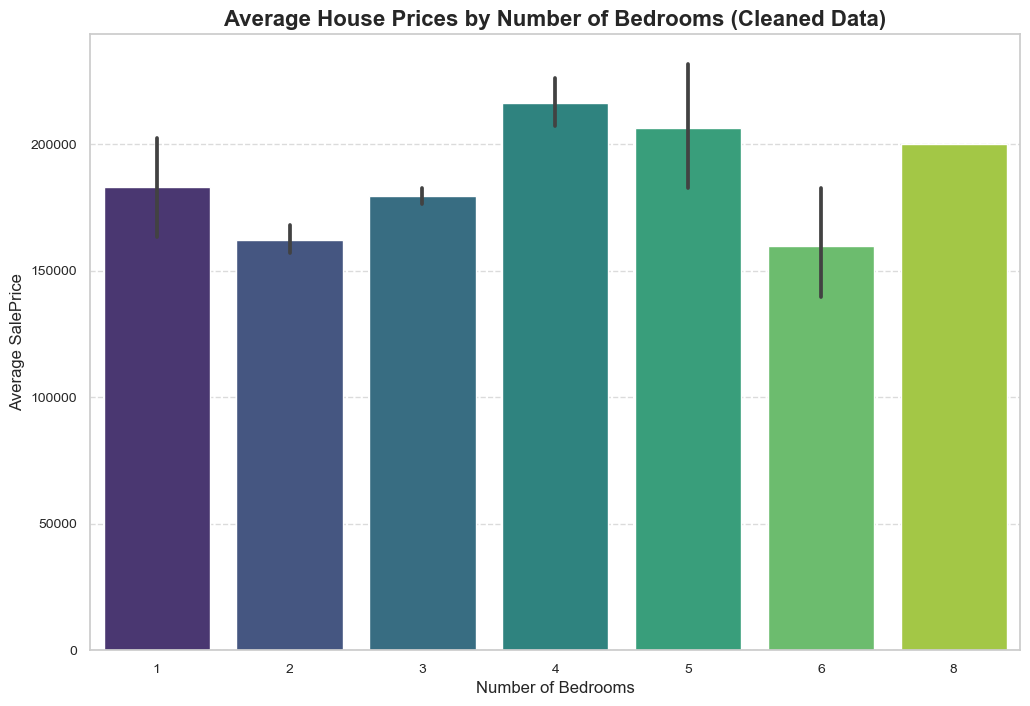

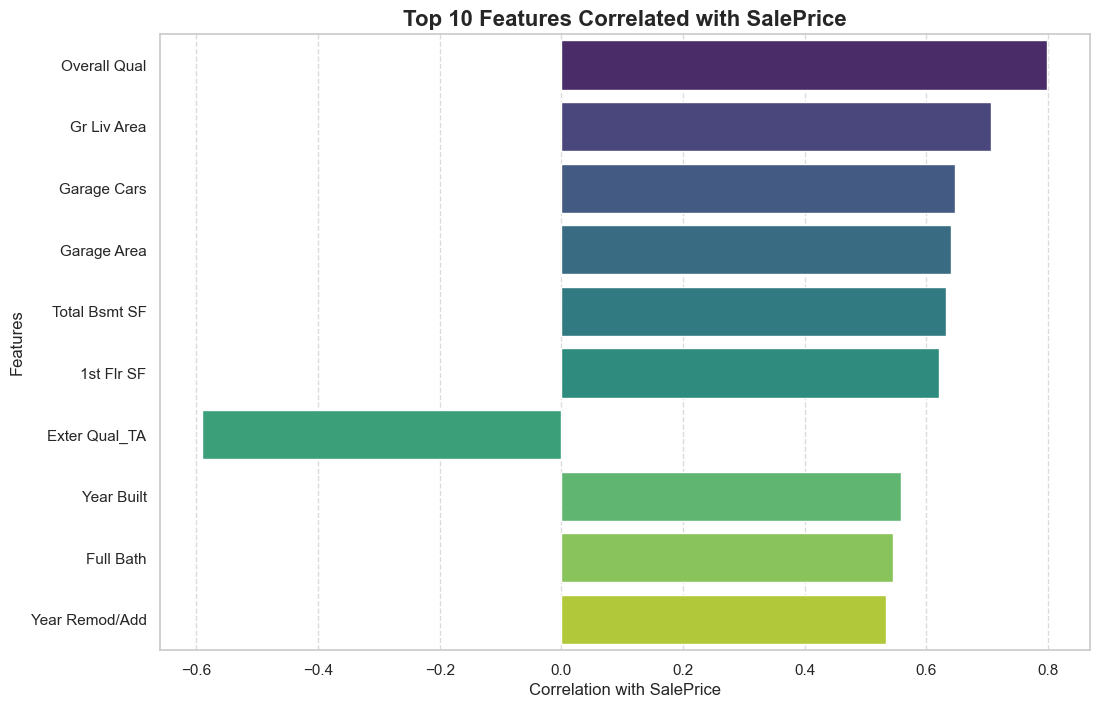

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Load the dataset
df = pd.read_csv('house_prices.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values
df = df.dropna(subset=['SalePrice'])  # Drop rows with missing target values

# Fill missing values in numeric columns with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Verify the column names
print(df.columns)

# Inspect rows where the number of bedrooms is 0
print(df[df['Bedroom AbvGr'] == 0])

# Remove rows where number of bedrooms is 0 if they are erroneous
df_cleaned = df[df['Bedroom AbvGr'] > 0]

# Plot the distribution of the number of bedrooms
plt.figure(figsize=(10, 6))
sns.histplot(df['Bedroom AbvGr'], bins=range(0, df['Bedroom AbvGr'].max() + 1), kde=False)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

# Average House Prices by Number of Bedrooms
plt.figure(figsize=(12, 8))
sns.barplot(x=df_cleaned['Bedroom AbvGr'], y=df_cleaned['SalePrice'], estimator=np.mean, palette='viridis')
plt.title('Average House Prices by Number of Bedrooms (Cleaned Data)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Average SalePrice', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Compute correlation matrix
correlation_matrix = df.corr()

# Get top 10 features correlated with SalePrice
top_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).index[1:11]

# Plot the top 10 features
plt.figure(figsize=(12, 8))
top_feature_corr = correlation_matrix.loc[top_features, 'SalePrice']
sns.barplot(x=top_feature_corr.values, y=top_feature_corr.index, palette='viridis')
plt.title('Top 10 Features Correlated with SalePrice', fontsize=16, fontweight='bold')
plt.xlabel('Correlation with SalePrice', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
